In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

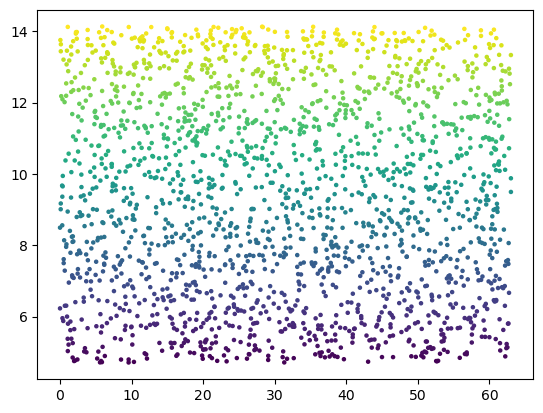

In [3]:
np.random.seed(0)
X, t = datasets.make_swiss_roll(2000)
X[:, 1] *= 3
ground_truth = np.stack([X[:, 1], t], axis=1)

plt.scatter(ground_truth[:, 0],ground_truth[:, 1], c=t,s =5, cmap = "viridis")

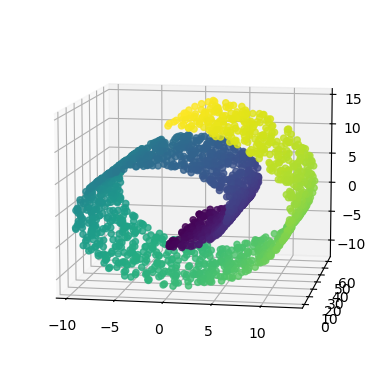

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap="viridis",  alpha=0.8)
ax.view_init(10, -80)

In [5]:
from scipy import stats,spatial

X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))

In [6]:
def correlation(matrix_A, matrix_B):
    
    from scipy import stats
    n_samples = matrix_A.shape[0]
    pearsonr_correlation_list = []
    spearmanr_correlation_list = []
    for i in range(n_samples):
        pearsonr_res = stats.pearsonr(matrix_A[i], matrix_B[i])
        pearsonr_correlation_list.append(pearsonr_res.statistic) 
        spearmanr_res = stats.spearmanr(matrix_A[i], matrix_B[i])
        spearmanr_correlation_list.append(spearmanr_res.statistic)
        
    pearsonr_correlation_mean = np.mean(pearsonr_correlation_list)
    spearmanr_correlation_mean = np.mean(spearmanr_correlation_list)
    pearsonr_correlation_interval = stats.norm.interval(confidence=0.95, loc=pearsonr_correlation_mean, scale=stats.sem(pearsonr_correlation_list))
    spearmanr_correlation_interval = stats.norm.interval(confidence=0.95, loc=spearmanr_correlation_mean, scale=stats.sem(spearmanr_correlation_list))
    
    correlation_mean = [pearsonr_correlation_mean,spearmanr_correlation_mean]
    correlation_interval = [pearsonr_correlation_interval,spearmanr_correlation_interval]
    
    pearsonr_correlation = [pearsonr_correlation_mean,pearsonr_correlation_interval]
    spearmanr_correlation = [spearmanr_correlation_mean,spearmanr_correlation_interval]
    
    return pearsonr_correlation_list,spearmanr_correlation_list,pearsonr_correlation,spearmanr_correlation 

In [7]:
from heatgeo.embedding import HeatGeo

Using s_gd2 for MDS. None


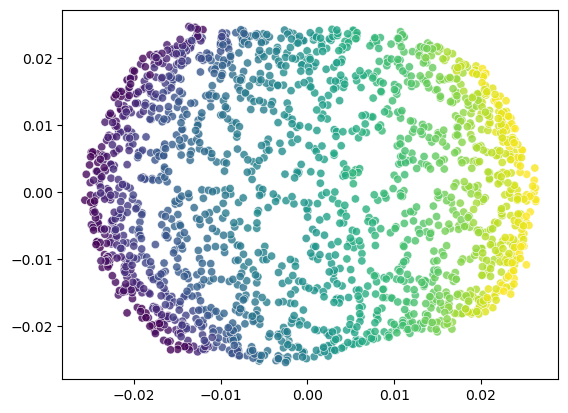

In [8]:
emb_op = HeatGeo(knn=5)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [9]:
heatgeo_dist = emb_op.dist

In [10]:
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

([0.5327197661050661, (0.5291857771463546, 0.5362537550637776)],
 [0.5360551162991055, (0.5290756360072773, 0.5430345965909338)])

In [11]:
dtne_pearsonr_list = []
dtne_pearsonr_l_list = []
dtne_pearsonr_h_list = []

dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

Using s_gd2 for MDS. None


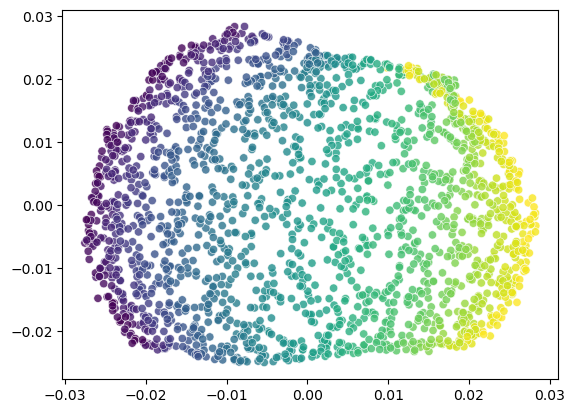

In [12]:
emb_op = HeatGeo(knn=10)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [13]:
heatgeo_dist = emb_op.dist
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

([0.573679968249259, (0.5668353408558486, 0.5805245956426694)],
 [0.5616448569772192, (0.5527430764718763, 0.5705466374825622)])

In [14]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

Using s_gd2 for MDS. None


([0.6474605145983842, (0.638146180925386, 0.6567748482713823)],
 [0.638568272344568, (0.6284379370758958, 0.6486986076132403)])

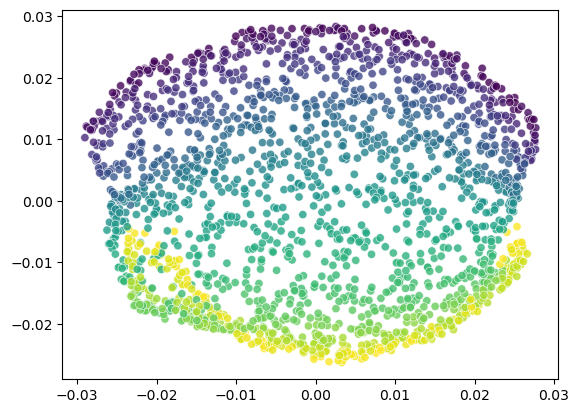

In [15]:
emb_op = HeatGeo(knn=15)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

heatgeo_dist = emb_op.dist
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

In [16]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

Using s_gd2 for MDS. None


([0.7375444683566214, (0.730075396662269, 0.7450135400509738)],
 [0.7219724990231247, (0.7139264209054635, 0.7300185771407858)])

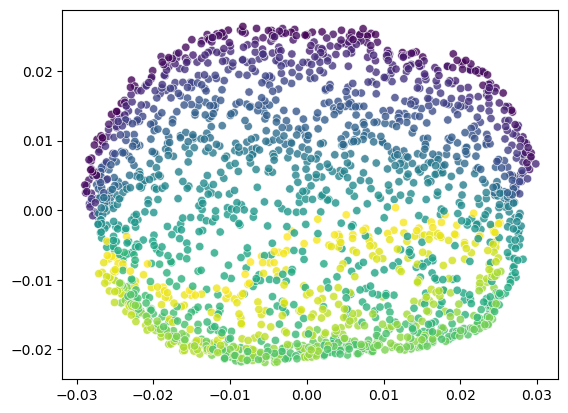

In [17]:
emb_op = HeatGeo(knn=20)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

heatgeo_dist = emb_op.dist
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

In [18]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

Using s_gd2 for MDS. None


([0.8037229743293113, (0.7979505564591104, 0.8094953921995122)],
 [0.7858130506370127, (0.7796325860710802, 0.7919935152029451)])

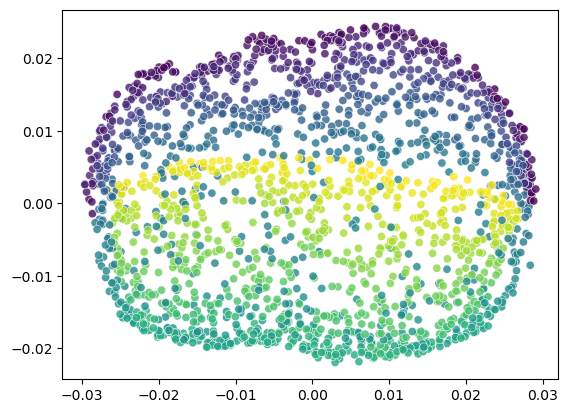

In [19]:
emb_op = HeatGeo(knn=25)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

heatgeo_dist = emb_op.dist
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

In [20]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

Using s_gd2 for MDS. None


([0.8359013741935656, (0.8307173311928707, 0.8410854171942604)],
 [0.8144777070109267, (0.8089987345661531, 0.8199566794557003)])

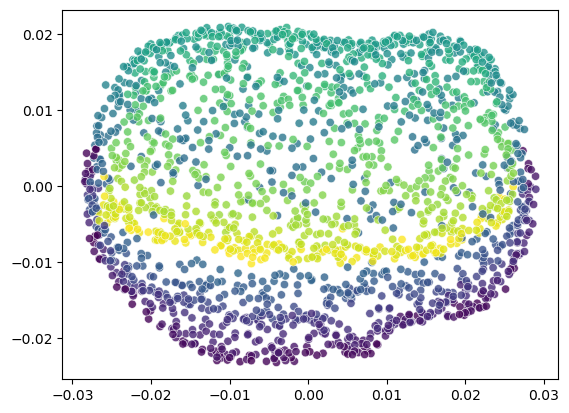

In [21]:
emb_op = HeatGeo(knn=30)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

heatgeo_dist = emb_op.dist
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

In [22]:
corr[3][0]

0.8144777070109267

In [23]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

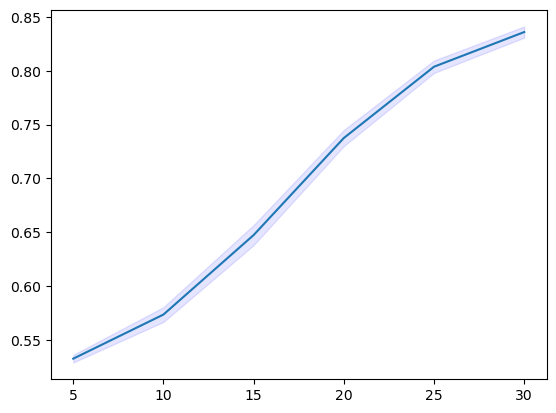

In [24]:
from matplotlib import pyplot as plt
import numpy as np

k = np.arange(5,31,5)

fig, ax = plt.subplots()
ax.plot(k,dtne_pearsonr_list)
ax.fill_between(k, dtne_pearsonr_l_list, dtne_pearsonr_h_list, color='b', alpha=.1)